# Data Analytics June 25 2021


### Surname 

**Write your Surname here**

## Name

**Write your Name here**

### Matricola ID

**Write your Matricola here**

In [1]:
import pandas as pd

The file ``Views.csv`` contains users views of 4 different channels of a streaming service. The channels are ``['Sport', 'Movies', 'News', 'Fiction']``.
In each row are reported: the date of the view (``Date``), the channel (``Channel``), the viewing time in minutes (``Duration``)  and the user id (``User``, ``integer``).

The file ``Calendar.csv`` contains all days of year 2020 along with the name of each day.

1. Read the file ``Views.csv`` into a convenient dataframe. 
2. If the dataframe contains ``NaN`` values in the ``Duration`` field, replace it with 0, if it contains ``NaN`` in other fields drop the corresponding row. 
3. Extract the total number of users.
4. 
    1. Create dataframes containing:
        1. The average and total viewing time for each channel in year 2020.
        2. The average and total viewing time for each day of the week. 
        3. [**Bonus**] Sort the dataframes of point b. by weekdays, i.e., Mon, Tue, Wed, Thu, Fri, Sat, Sun.
    2. Graph the distribution of the viewing times for each channel.
5. Create a multi-indexed dataframe containing the viewing time for each day of the week (first level index) and for each channel (second level index). What is the most watched channel over the weekend?

6. **Bonus question**

    Assuming viewing times have the following costs per channel:
    
    - ``'Sport'``: 0.35 Euro/min for duration greater than 10 minutes, 0 otherwise.
    - ``'Movies'``: 0.20 Euro/min for duration greater than 15 minutes, 0 otherwise.
    - ``'News'``: 0.10 Euro/min for duration greater than 5 minutes, 0 otherwise.
    - ``'Fiction'``: 0.25 Euro/min for duration greater than 10 minutes, 0 otherwise.
    
   Calculate the bill for each user.


In [2]:
views = pd.read_csv('Views.csv', sep=';')

In [3]:
views

,Unnamed: 0,Date,Channel,Duration,User
0,0,28/09/20,Sport,17.0,100012.0
1,1,06/09/20,Sport,75.0,100014.0
2,2,20/09/20,Sport,2.0,100016.0
3,3,24/08/20,Movies,15.0,100021.0
4,4,18/08/20,Fiction,5.0,100009.0
...,...,...,...,...,...
72995,72995,22/06/20,News,10.0,100034.0
72996,72996,11/02/20,Movies,8.0,100038.0
72997,72997,04/01/20,Sport,19.0,100005.0
72998,72998,26/03/20,Movies,30.0,100042.0


In [26]:
del views[views.columns[0]]

In [27]:
views['Duration'].isnull().any()

False

In [28]:
views['Duration'].fillna(value = 0, inplace = True)

In [29]:
views['Duration'].isnull().any()

False

In [30]:
views.isnull().any()

Date        False
Channel     False
Duration    False
User        False
dtype: bool

In [31]:
views.dropna(axis = 0 , inplace = True, how = 'any')

In [32]:
views.isnull().any()

Date        False
Channel     False
Duration    False
User        False
dtype: bool

In [33]:
views

,Date,Channel,Duration,User
0,28/09/20,Sport,17.0,100012.0
1,06/09/20,Sport,75.0,100014.0
2,20/09/20,Sport,2.0,100016.0
3,24/08/20,Movies,15.0,100021.0
4,18/08/20,Fiction,5.0,100009.0
...,...,...,...,...
72995,22/06/20,News,10.0,100034.0
72996,11/02/20,Movies,8.0,100038.0
72997,04/01/20,Sport,19.0,100005.0
72998,26/03/20,Movies,30.0,100042.0


In [34]:
users = views.pivot_table(index='User', aggfunc = 'sum')

## number of users 

In [35]:
users.count()

Duration    50
dtype: int64

In [36]:
calendar = pd.read_csv('Calendar.csv', sep=';')

In [37]:
calendar

,Date,WeekDay
0,01/01/20,Wednesday
1,02/01/20,Thursday
2,03/01/20,Friday
3,04/01/20,Saturday
4,05/01/20,Sunday
...,...,...
361,27/12/20,Saturday
362,28/12/20,Monday
363,29/12/20,Tuesday
364,30/12/20,Wednesday


In [38]:
table = pd.merge(views, calendar, left_on='Date', right_on='Date')

In [39]:
table

,Date,Channel,Duration,User,WeekDay
0,28/09/20,Sport,17.0,100012.0,Wednesday
1,28/09/20,News,13.0,100000.0,Wednesday
2,28/09/20,Sport,40.0,100003.0,Wednesday
3,28/09/20,Sport,3.0,100008.0,Wednesday
4,28/09/20,News,12.0,100004.0,Wednesday
...,...,...,...,...,...
72982,27/05/20,News,15.0,100001.0,Thursday
72983,27/05/20,Sport,25.0,100026.0,Thursday
72984,27/05/20,Fiction,25.0,100045.0,Thursday
72985,27/05/20,News,0.0,100026.0,Thursday


In [40]:
views

,Date,Channel,Duration,User
0,28/09/20,Sport,17.0,100012.0
1,06/09/20,Sport,75.0,100014.0
2,20/09/20,Sport,2.0,100016.0
3,24/08/20,Movies,15.0,100021.0
4,18/08/20,Fiction,5.0,100009.0
...,...,...,...,...
72995,22/06/20,News,10.0,100034.0
72996,11/02/20,Movies,8.0,100038.0
72997,04/01/20,Sport,19.0,100005.0
72998,26/03/20,Movies,30.0,100042.0


In [42]:
views.pivot_table(values = 'Duration', index='Channel', aggfunc = 'sum')

,Duration
Channel,
Fiction,269784.0
Movies,379211.0
News,157090.0
Sport,536938.0


In [43]:
views.pivot_table(values = 'Duration', index='Channel')

,Duration
Channel,
Fiction,14.785926
Movies,20.783240
News,8.610030
Sport,29.421260


In [44]:
views.pivot_table(values = 'Duration', index='Date', aggfunc = 'sum')

,Duration
Date,
01/01/20,2688.0
01/02/20,2196.0
01/03/20,5231.0
01/04/20,2347.0
01/05/20,2585.0
...,...
31/03/20,2210.0
31/05/20,5755.0
31/07/20,5750.0


In [46]:
views.pivot_table(values = 'Duration', index='Date')

,Duration
Date,
01/01/20,13.440000
01/02/20,10.980000
01/03/20,26.155000
01/04/20,11.735000
01/05/20,12.925000
...,...
31/03/20,11.050000
31/05/20,28.775000
31/07/20,28.894472


In [47]:
 plot = views.pivot_table(values = 'Duration', index='Date')

<AxesSubplot:xlabel='Date'>

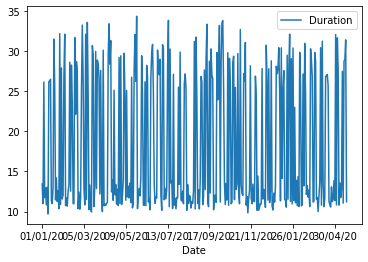

In [48]:
plot.plot()

In [49]:
 plot = views.pivot_table(values = 'Duration', index='Channel')

<AxesSubplot:xlabel='Channel'>

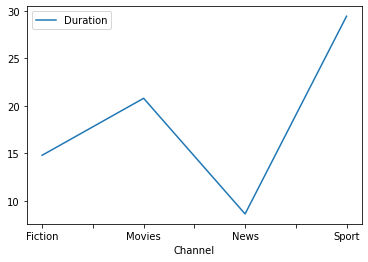

In [51]:
plot.plot()